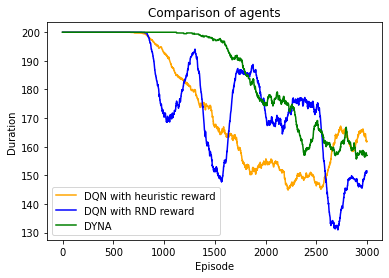

In [6]:
import json
import torch
import matplotlib.pyplot as plt

with open('episode_durations.json', 'r') as f:
    DQN_heur_performance = json.load(f)
with open('DYNA_performance.json', 'r') as f:
    DYNA_performance = json.load(f)
with open('DQN_RND_performance.json', 'r') as f:
    DQN_RND_performance = json.load(f)

durations_t = torch.tensor(DQN_heur_performance, dtype=torch.float)
dyna_durations_t = torch.tensor(DYNA_performance, dtype=torch.float)
rnd_durations_t = torch.tensor(DQN_RND_performance, dtype=torch.float)

plt.title('Comparison of agents')
plt.xlabel('Episode')
plt.ylabel('Duration')

moving_avg = []
for i in range(len(DQN_heur_performance)):
    if i < 100:
        moving_avg.append(durations_t[:i+1].mean().item())  # Cumulative moving average
    else:
        moving_avg.append(durations_t[i-99:i+1].mean().item())  # Simple moving average

plt.plot(range(len(DQN_heur_performance)), moving_avg, color='orange', label='DQN with heuristic reward')

moving_avg = []
for i in range(len(DQN_RND_performance)):
    if i < 100:
        moving_avg.append(rnd_durations_t[:i+1].mean().item())  # Cumulative moving average
    else:
        moving_avg.append(rnd_durations_t[i-99:i+1].mean().item())  # Simple moving average

plt.plot(range(len(DQN_RND_performance)), moving_avg, color='blue', label='DQN with RND reward')

moving_avg = []
for i in range(len(DYNA_performance)):
    if i < 100:
        moving_avg.append(dyna_durations_t[:i+1].mean().item())  # Cumulative moving average
    else:
        moving_avg.append(dyna_durations_t[i-99:i+1].mean().item())  # Simple moving average

plt.plot(range(len(DYNA_performance)), moving_avg, color='green', label='DYNA')


plt.legend()
plt.savefig(f"Comparison_agents.png", dpi=300)
plt.show()

In [ ]:
with open('DQN_heur_env.json', 'r') as f:
    DQN_heur_env = json.load(f)

dqn_heur_env_t = torch.tensor(DQN_heur_env, dtype=torch.float)

plt.title('Comparison of cumulative environment reward per episode')
plt.xlabel('Episode')
plt.ylabel('Cumulative environment reward')

moving_avg = []
for i in range(len(DQN_heur_env)):
    if i < 100:
        moving_avg.append(dqn_heur_env_t[:i+1].mean().item())  # Cumulative moving average
    else:
        moving_avg.append(dqn_heur_env_t[i-99:i+1].mean().item())  # Simple moving average

plt.plot(range(len(DQN_heur_env)), moving_avg, color='orange', label='DQN agent with heuristic reward')
plt.legend()
plt.savefig(f"Comparison_agents_env_reward.png", dpi=300)
w